# Lab 07-2 linear regression(without min/max)

* linear regression에 대한 설명 (Data에 대한 표준화나 정규화 없이 수행)

### 기본 Library 선언 및 TensorFlow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.1.0


### 강의에 설명할 Data입니다
* X Data(feature)의 값은 해당 배열의 첫번째 값부터 4번째 값까지로 정의 되고 Y Data(label)는 해당 배열의 마지막 값을 정의(5번째 값)

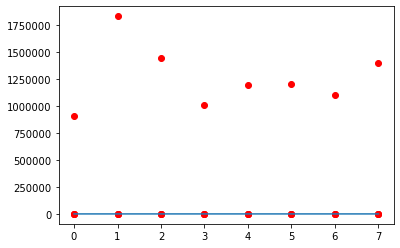

In [2]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()


### 위 Data를 기준으로 Linear Regression 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* X(features),Y(labels)는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([3, 3],tf.zeros([3,3]) )

In [4]:
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

* Linear Regression의 Hyphthesis를 정의한다 

In [5]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

* 가설을 검증할 Cost 함수를 정의합니다(Mean Square Error를 사용)

In [6]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

* GradientDescentOptimizer로 학습 실행

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b]), loss_value

### TensorFlow를 통해 학습을 진행합니다

In [8]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        hypo_value = linearReg_fn(features)
        grads, loss_value = grad(linearReg_fn(features), features, labels)        
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))    
    print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))

Iter: 0, Loss: 5136834560.0000, Prediction: [[ -49687.156]
 [-100995.7  ]
 [ -79251.805]
 [ -55277.945]
 [ -65311.965]
 [ -65869.88 ]
 [ -60302.1  ]
 [ -77032.25 ]]
Iter: 1, Loss: 5643738114795014560153600.0000, Prediction: [[1.6757712e+12]
 [3.3734994e+12]
 [2.6538103e+12]
 [1.8603067e+12]
 [2.1924710e+12]
 [2.2109246e+12]
 [2.0263888e+12]
 [2.5799961e+12]]
Iter: 2, Loss: inf, Prediction: [[-5.5545700e+19]
 [-1.1181920e+20]
 [-8.7964132e+19]
 [-6.1662384e+19]
 [-7.2672415e+19]
 [-7.3284082e+19]
 [-6.7167397e+19]
 [-8.5517446e+19]]
Iter: 3, Loss: inf, Prediction: [[1.8411371e+27]
 [3.7063977e+27]
 [2.9156894e+27]
 [2.0438829e+27]
 [2.4088251e+27]
 [2.4290997e+27]
 [2.2263541e+27]
 [2.8345910e+27]]
Iter: 4, Loss: inf, Prediction: [[-6.1026973e+34]
 [-1.2285356e+35]
 [-9.6644454e+34]
 [-6.7747254e+34]
 [-7.9843760e+34]
 [-8.0515789e+34]
 [-7.3795507e+34]
 [-9.3956341e+34]]
Iter: 5, Loss: inf, Prediction: [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
Iter: 6, Loss: nan, Predict

 [nan]]
Iter: 94, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 95, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 96, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 97, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 98, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 99, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 100, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
